In [1]:
#This is the notebook that will retreive all of our href from the steam store. This could have been all done in one notebook,
#but I was running this notebook and Scraper concurrently

In [18]:
df = pd.read_csv('final_Data4.csv', encoding='latin1')
df['Review'].value_counts()
df

,Name,Review,Date,Dev name,Tags
0,NaN,Mostly Negative,NaN,NaN,NaN
1,This War of Mine: Stories - Fading Embers (ep. 3),Mostly Negative,"Aug 6, 2019",NaN,"['Adventure', 'Indie', 'Simulation', 'Survival..."
2,FaeVerse Alchemy,Mostly Negative,"Apr 2, 2014",NaN,"['Casual', 'Indie', 'Strategy', 'Early Access'..."
3,NaN,Mostly Negative,NaN,NaN,NaN
4,Survive on Raft,Mostly Negative,"Jul 5, 2019",NaN,"['Simulation', 'Indie', 'Multiplayer', 'Surviv..."
...,...,...,...,...,...
8070,Woodlands,Mostly Negative,"Sep 27, 2017",NaN,"['Indie', 'Action', 'Adventure', 'Survival', '..."
8071,Ranger of the jungle,Mostly Negative,"Jul 16, 2016",NaN,"['Strategy', 'Indie', 'Casual', 'Tower Defense']"
8072,NaN,Mostly Negative,NaN,NaN,NaN
8073,NaN,Mostly Negative,NaN,NaN,NaN


In [12]:
import re
import csv 
import time
import requests
import numpy as np 
import pandas as pd
import seaborn as sns
from csv import writer
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait

In [13]:
#Get the soup object from specified url
def getSoup(url):
    try:
        source = requests.get(url).text
        soup = BeautifulSoup(source, 'lxml')
        print(url)
        return soup
    except Exception as e:
        print(e)
        pass

In [14]:
#Finding the different href
def getHref(url):
    try:
        soup = getSoup(url)
        links_with_text = [a['href'] for a in soup.find_all('a', href=True) if a.text]
        #print(links_with_text)
        return links_with_text
    except:
        pass

In [15]:
#Got this function from: https://thispointer.com/python-how-to-append-a-new-row-to-an-existing-csv-file/
def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

In [16]:
#I am just creating our csv file with header Href
with open('steam_href_user_review5.csv', 'a') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Href'])

<AxesSubplot:>

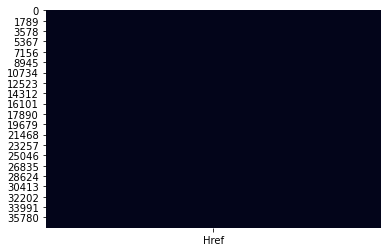

In [17]:
href3_steam = pd.read_csv('steam_href_user_review5.csv')
sns.heatmap(href3_steam.isnull(), cbar=False)

In [19]:
#Getting all the game links from a specific steam page
#TimeoutException: Message: timeout: Timed out receiving message from renderer: 300.000
#This will only run once. The challenge is the infinitely scrolling steam page
url = 'https://store.steampowered.com/search/?sort_by=Reviews_DESC'
PATH = 'C:\Program Files (x86)\chromedriver.exe'
driver = webdriver.Chrome(PATH)
driver.get(url)
listing_links = []
nbsHrefPerPage = -150
location = 0
y = 0
for i in range(10000):
    print(i)
    #We scroll three time and wait to make sure that we have time to get all the 
    nbsHrefPerPage = nbsHrefPerPage + 150
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.5)
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.5)
    y = str(y)
    print(y)
    #17549
    #912122
    driver.execute_script("window.scrollTo(0," + y + ")")
    for j in range(150):
        links = driver.find_elements_by_xpath('//*[@id="search_resultsRows"]/a[' + str(j + nbsHrefPerPage) + ']')
        if isinstance(location, dict):
            y = location['y']
        print(j + nbsHrefPerPage)
        print(links)
        #Have to iterate though list to find href.
        for link in links:
            location = link.location
            print(str(link.get_attribute('href')))
            listing_links.append(str(link.get_attribute('href')))
            row_contents = [str(link.get_attribute('href'))]
            append_list_as_row('steam_href_user_review555.csv', row_contents)
driver.close()
driver.quit()

0
0
0
[]
1
[<selenium.webdriver.remote.webelement.WebElement (session="e224322e02c2cdbe0e57631ecc1b0b0c", element="fa2a3dad-8c5c-4661-8c2a-907a2c54a686")>]
https://store.steampowered.com/app/1089980/The_Henry_Stickmin_Collection/?snr=1_7_7_230_150_1
2
[<selenium.webdriver.remote.webelement.WebElement (session="e224322e02c2cdbe0e57631ecc1b0b0c", element="a7e85b45-f256-40ff-950c-7ede1137c2d0")>]
https://store.steampowered.com/app/1229490/ULTRAKILL/?snr=1_7_7_230_150_1
3
[<selenium.webdriver.remote.webelement.WebElement (session="e224322e02c2cdbe0e57631ecc1b0b0c", element="c5938837-f06f-45c6-a867-af648a69a9a8")>]
https://store.steampowered.com/app/1144400/SenrenBanka/?snr=1_7_7_230_150_1
4
[<selenium.webdriver.remote.webelement.WebElement (session="e224322e02c2cdbe0e57631ecc1b0b0c", element="901f80d2-e011-4549-b87d-07f1db5ceeeb")>]
https://store.steampowered.com/app/1055540/A_Short_Hike/?snr=1_7_7_230_150_1
5
[<selenium.webdriver.remote.webelement.WebElement (session="e224322e02c2cdbe0e57

40
[<selenium.webdriver.remote.webelement.WebElement (session="e224322e02c2cdbe0e57631ecc1b0b0c", element="05c03782-7b72-4188-ab8e-8bd6e6f6047b")>]
https://store.steampowered.com/app/420530/OneShot/?snr=1_7_7_230_150_1
41
[<selenium.webdriver.remote.webelement.WebElement (session="e224322e02c2cdbe0e57631ecc1b0b0c", element="ec79cd15-8f5a-4b4b-8ec6-8d342204f4c3")>]
https://store.steampowered.com/app/374570/Kung_Fury/?snr=1_7_7_230_150_1
42
[<selenium.webdriver.remote.webelement.WebElement (session="e224322e02c2cdbe0e57631ecc1b0b0c", element="87b43d15-817f-4a95-967e-6c14950fea6c")>]
https://store.steampowered.com/app/264200/One_Finger_Death_Punch/?snr=1_7_7_230_150_1
43
[<selenium.webdriver.remote.webelement.WebElement (session="e224322e02c2cdbe0e57631ecc1b0b0c", element="8089daab-835a-463b-82ca-b5310b609f9d")>]
https://store.steampowered.com/bundle/16473/Babas_Sausage_Expedition__Puzzle_Game_Masterpieces/?snr=1_7_7_230_150_1
44
[<selenium.webdriver.remote.webelement.WebElement (session=

https://store.steampowered.com/app/1093910/Tales_of_the_Black_Forest/?snr=1_7_7_230_150_2
77
[<selenium.webdriver.remote.webelement.WebElement (session="e224322e02c2cdbe0e57631ecc1b0b0c", element="80086f47-e2ae-4012-82a8-94e71b7a4313")>]


KeyboardInterrupt: 

In [ ]:
df4 = pd.read_csv('steam_href_user_review.csv')
df4